In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

In [68]:
files = os.listdir(path='data')

In [69]:
def read_files(files, datapath='data/', delimiter = ';'):
        df_temp = []

        if type(files) == list:
            for i in files:
                df = pd.read_csv(datapath+i, delimiter=delimiter, parse_dates=True, index_col='timestamp')
                day_name = df.index.day_name()[0][:3]
                df['customer_no'] = df.customer_no.apply(lambda x: f'{day_name}_{x}')
                df_temp.append(df)
            df = pd.concat(df_temp)
        else:
            df = pd.read_csv(files, delimiter=delimiter, parse_dates=True, index_col='timestamp')
            day_name = df.index.day_name()[0][:3]
            df['customer_no'] = df.customer_no.apply(lambda x: f'{day_name}_{x}')

        return df

In [70]:
shop_data = read_files(files)

# Part 1: Data Exploration

In [71]:
shop_data = shop_data.sort_values(by='timestamp')

##### Get list of all sections in the store

In [72]:
store_sections = list(shop_data.location.unique())

In [73]:
shop_data.reset_index(inplace=True)

In [74]:
sort_customer = shop_data.groupby(['customer_no', 'location'])['timestamp'].agg(['min']).sort_values(by=['customer_no','min'])

In [75]:
sort_customer

min
customer_no location                    
Fri_1       dairy    2019-09-06 07:00:00
            spices   2019-09-06 07:04:00
            checkout 2019-09-06 07:05:00
Fri_10      fruit    2019-09-06 07:06:00
            checkout 2019-09-06 07:11:00
...                                  ...
Wed_998     dairy    2019-09-04 16:53:00
            fruit    2019-09-04 16:57:00
            checkout 2019-09-04 16:59:00
Wed_999     fruit    2019-09-04 16:53:00
            checkout 2019-09-04 16:54:00

[21671 rows x 1 columns]

# Calculate the total number of customers in each section

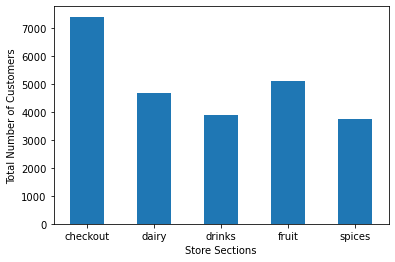

----Section Visitation Numbers----
 The following sections have had 24877 vists between 2019-09-02 and 2019-09-06:

Checkout: 7417
Dairy: 4679
Drinks: 3905
Fruit: 5122
Spices: 3754


In [77]:
shop_data.groupby('location')['customer_no'].count().plot(kind='bar')
plt.xlabel('Store Sections')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation=0)
plt.show()

locations = shop_data.groupby('location')['customer_no'].count().reset_index()
total_visits = locations.sum()

#start_date = shop_data.index.date.min()
#end_date = shop_data.index.date.max()

print(f'----Section Visitation Numbers----\n \
The following sections have had {total_visits[1]} vists between {start_date} and {end_date}:\n')
for idx, rows in locations.iterrows():
    print(f'{rows[0].title()}: {rows[1]}')


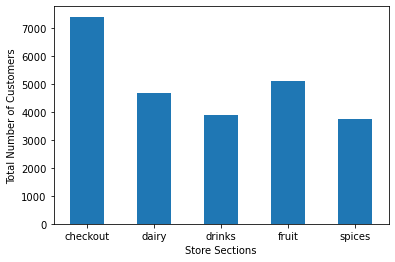

----Section Visitation Numbers----
 The following sections have had and average of 24877 daily vists between 2019-09-02 and 2019-09-06:

Checkout: 7417
Dairy: 4679
Drinks: 3905
Fruit: 5122
Spices: 3754


In [85]:
shop_data.groupby('location')['customer_no'].count().plot(kind='bar')
plt.xlabel('Store Sections')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation=0)
plt.show()

locations = shop_data.groupby('location')['customer_no'].count().reset_index()
#print(locations)
total_visits = locations.sum()

#start_date = shop_data.index.date.min()
#end_date = shop_data.index.date.max()

print(f'----Section Visitation Numbers----\n \
The following sections have had and average of {int(total_visits[1])} daily vists between {start_date} and {end_date}:\n')
for idx, rows in locations.iterrows():
    print(f'{rows[0].title()}: {int(rows[1])}')

In [ ]:
day_overtime = shop_data.groupby(['location', shop_data.index.hour])['customer_no'].count().reset_index()

In [ ]:
day_overtime

In [ ]:
sections_overtime = day_overtime.pivot(index='timestamp', columns='location', values='customer_no')

In [ ]:
sections_overtime.plot()
sections_overtime

In [ ]:
sections_overtime['day']

In [ ]:
day_checkouts = sections_overtime['checkout']

# Display the number of customers at checkout over time

In [ ]:
sections_overtime['checkout'].plot(kind='line')
plt.xlabel(f'Trend from {start_date} to {end_date}')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=20)
plt.show()

day_totals = day_checkouts['customer_no'].sum()

print(f'----Section Visitation Numbers----\n \
The following sections have had an average of {int(day_totals)} daily vists between {start_date} and {end_date}:\n')
for idx, rows in day_checkouts.iterrows():
    print(f'{rows[0]}: {int(rows[2])}')

In [ ]:
day_checkouts.plot(x='timestamp', y='customer_no', kind='bar')
plt.xlabel(f'Trend from {start_date} to {end_date}')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=20)
plt.show()

day_totals = day_checkouts['customer_no'].sum()

print(f'----Section Visitation Numbers----\n \
The following sections have had an average of {int(day_totals)} daily vists between {start_date} and {end_date}:\n')
for idx, rows in day_checkouts.iterrows():
    print(f'{rows[0]}: {int(rows[2])}')

# Calculate the time each customer spent in the market

In [ ]:
def total_time(dataframe):
    time_diff = dataframe[1] - dataframe[0]
    
    total_time = time_diff.seconds / 60
    
    return time_diff.seconds

In [ ]:
shop_data

In [ ]:
shop_data['day'] = shop_data.index.day_name()

In [ ]:
shop_data.reset_index(inplace=True)

In [ ]:
customers = shop_data.groupby(['day','customer_no'])['timestamp'].agg(['min', 'max'])

In [ ]:
customers

In [ ]:
customers['total_shop_time (seconds)'] = customers[['min','max']].apply(total_time, axis=1)

In [ ]:
total_avg_time_spent = round(customers['total_shop_time (seconds)'].mean(),1)

In [ ]:
daily_avg_time_spent = customers.groupby('day')[['total_shop_time (seconds)']].mean().reset_index()
daily_avg_time_spent

In [ ]:
daily_avg_time_spent.plot(x='day', y='total_shop_time (seconds)', kind='bar')
plt.xlabel(f'Trend from {start_date} to {end_date}')
plt.ylabel('Average Shopping Time (in seconds)')
plt.title('Average Time Spent Shopping')
plt.xticks(rotation=20)
plt.show()

print(f'----Section Visitation Numbers----\n \
Customers spend on average {total_avg_time_spent} seconds shopping on the days between {start_date} and {end_date}:\n')
for idx, rows in daily_avg_time_spent.iterrows():
    print(f'{rows[0]}: {round(rows[1], 2)} seconds spent in the store')

In [ ]:
t = shop_data.groupby('day')